In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the Data

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\archive\A_Z Handwritten Data\A_Z Handwritten Data.csv").astype("float32")
data.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing Data

In [42]:
X = data.drop('0',axis = 1)
y = data['0']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))
x_train.shape
x_test.shape

(74490, 28, 28)

In [45]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

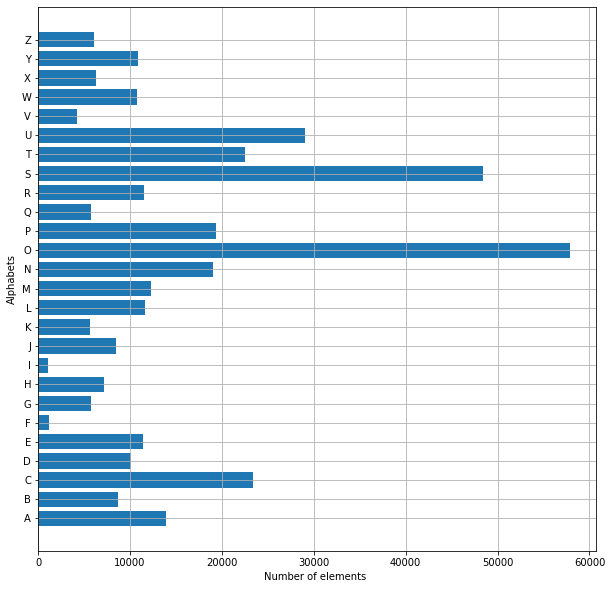

In [46]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

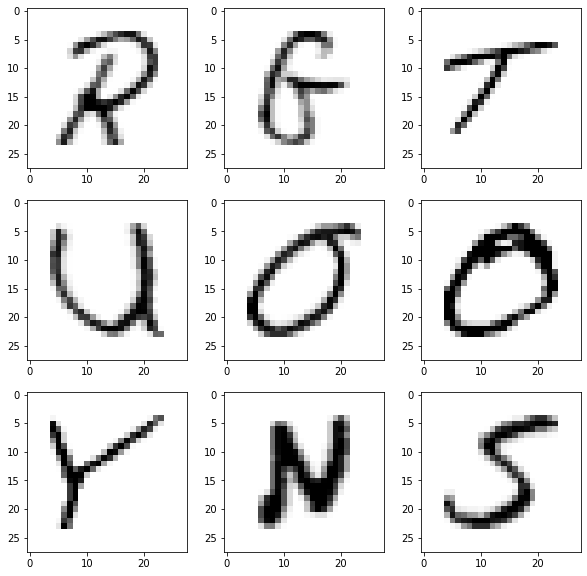

In [47]:
import cv2
shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [48]:
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print("train data: ", X_train.shape)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("test data: ", X_test.shape)

train data:  (297960, 28, 28, 1)
test data:  (74490, 28, 28, 1)


In [50]:
from tensorflow.keras.utils import to_categorical

In [51]:

Yh_train = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", Yh_train.shape)
Yoh_test = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", Yoh_test.shape)


New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


# Building A Model

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [53]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = "relu",input_shape= (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = "relu",padding = "same"))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = "relu",padding = "valid"))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation= "relu"))
model.add(Dense(26,activation="softmax"))

# Compiling

In [32]:
model.compile(optimizer= Adam(learning_rate=0.001),loss = "categorical_crossentropy",metrics = ["accuracy"])
history = model.fit(x_train,Yh_train,epochs = 1,batch_size = 32,validation_data= (x_test,Yoh_test))

9312/9312 [==============================] - 208s 22ms/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 0.0592 - val_accuracy: 0.9837


In [29]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 128)       

In [33]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9837024807929993]
The training accuracy is : [0.9829205274581909]
The validation loss is : [0.05915538966655731]
The training loss is : [0.06337860971689224]


# Predicting 

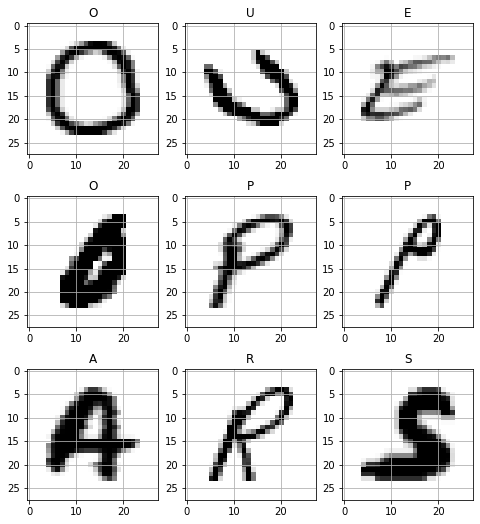

In [39]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(Yoh_test[i])]
    ax.set_title(pred)
    ax.grid()